In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# auto-encoder
### Reference: https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/autoencoder.ipynb

In [21]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [22]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f9d9c3c49b0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f9d9c3c4908>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f9d9c3c4a20>)

In [23]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256


# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input]) #(batch_size, num_input_dimesion)

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])), # w1:(784, 256)
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])), # w2:(256, 128)
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])), # w3:(128, 256)
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])), # w4:(256, 784)
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])), # b1:(256,)
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])), # b2:(128,)
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])), # b3:(256,)
    'decoder_b2': tf.Variable(tf.random_normal([num_input])), # # b4:(784,)
}

In [24]:
# Building the encoder
def encoder(x):
    '''
    attivation func: sigmoid
    input: input data iteself
    output: latent vector
    '''
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op 
# Targets (Labels) are the input data itself.
y_true = X 

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2)) # tf.pow(y_true - y_pred, 2): return
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [40]:
# Start Training
display_step = 1000

# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)
    #print ('batch_x', batch_x.shape)
    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))


Step 1: Minibatch Loss: 0.464701
Step 1000: Minibatch Loss: 0.134976
Step 2000: Minibatch Loss: 0.113905
Step 3000: Minibatch Loss: 0.100333
Step 4000: Minibatch Loss: 0.093595
Step 5000: Minibatch Loss: 0.090714
Step 6000: Minibatch Loss: 0.084633
Step 7000: Minibatch Loss: 0.082125
Step 8000: Minibatch Loss: 0.080300
Step 9000: Minibatch Loss: 0.078539
Step 10000: Minibatch Loss: 0.070800
Step 11000: Minibatch Loss: 0.068289
Step 12000: Minibatch Loss: 0.067055
Step 13000: Minibatch Loss: 0.064514
Step 14000: Minibatch Loss: 0.062348
Step 15000: Minibatch Loss: 0.061883
Step 16000: Minibatch Loss: 0.060037
Step 17000: Minibatch Loss: 0.060218
Step 18000: Minibatch Loss: 0.059434
Step 19000: Minibatch Loss: 0.061453
Step 20000: Minibatch Loss: 0.055298
Step 21000: Minibatch Loss: 0.053127
Step 22000: Minibatch Loss: 0.052139
Step 23000: Minibatch Loss: 0.049979
Step 24000: Minibatch Loss: 0.051794
Step 25000: Minibatch Loss: 0.050583
Step 26000: Minibatch Loss: 0.048739
Step 27000: Mi

canvas_orig (112, 112)
batch_x (4, 784)
g (4, 784)
batch_x (4, 784)
g (4, 784)
batch_x (4, 784)
g (4, 784)
batch_x (4, 784)
g (4, 784)
Original Images


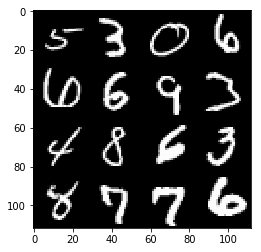

Reconstructed Images


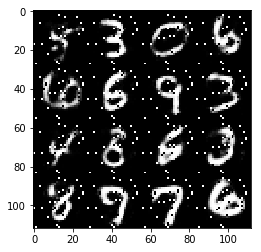

In [45]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
# initialize variables
canvas_orig = np.empty((28 * n, 28 * n))
print ('canvas_orig', canvas_orig.shape)
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n) # (4, 784)
    print ('batch_x', batch_x.shape) 
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x}) # (4, 784)
    print ('g', g.shape)
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()


# tf.pow(x,y) : Computes the power of one value to another.

In [38]:
x = np.array([1.0,2.0,3.0])
y = 2
c = tf.pow(x, y)  # [[256, 65536], [9, 27]]
d = tf.reduce_mean(c, axis = None)  
# Using the context manager.
with tf.Session() as sess:
    c = sess.run(c) 
    d = sess.run(d)
    print ('c',c)
    print ('d', d)

c [1. 4. 9.]
d 4.666666666666667


# tf.reduce_mean(input_tensor) :Computes the mean of elements across dimensions of a tensor

In [32]:
x = tf.constant([[1., 2.], [3., 4.]])
x1 = tf.reduce_mean(x)  # 1.5
tf.reduce_mean(x, 0)  # [1.5, 1.5]
tf.reduce_mean(x, 1)  # [1.,  2.]
# Using the context manager.
with tf.Session() as sess:
    x = sess.run(x) 
    x1 = sess.run(x1)
    print ('x', x, x.shape)
    print ('x1', x1)

x [[1. 2.]
 [3. 4.]] (2, 2)
x1 2.5
